<a href="https://colab.research.google.com/github/LDLeeHou/Practice/blob/main/prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 482 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [7]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 80 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637502 sha256=853fd03dbb09ce2aa9635bc62a72971ec6047f6fad13ea15ca0f4e518b3c45b8
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


# Forecasting Stocks from Yahoo Finance with Prophet

In [8]:
import yfinance as yf

# S&P f00 ETF
ticker = yf.Ticker('SPY')

hist = ticker.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-01-29,25.456180,25.456180,25.329532,25.438087,1003200,0.0,0
1993-02-01,25.456184,25.619017,25.456184,25.619017,480500,0.0,0
1993-02-02,25.600924,25.691387,25.546646,25.673294,201300,0.0,0
1993-02-03,25.709482,25.962778,25.691390,25.944685,529400,0.0,0
1993-02-04,26.035143,26.107514,25.745663,26.053236,531500,0.0,0
...,...,...,...,...,...,...,...
2022-08-25,415.239990,419.559998,414.089996,419.510010,50942300,0.0,0
2022-08-26,419.390015,419.959991,405.250000,405.309998,102896000,0.0,0
2022-08-29,402.200012,405.839996,401.200012,402.630005,65370800,0.0,0


In [9]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
7447,2022-08-25,419.510010
7448,2022-08-26,405.309998
7449,2022-08-29,402.630005
7450,2022-08-30,398.209991
7451,2022-08-31,395.179993


In [10]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)

m.fit(df)

In [11]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
7810,2023-08-25,475.731548,457.096510,494.054405
7811,2023-08-26,476.085300,458.416814,495.521504
7812,2023-08-27,476.220727,458.941893,494.869980
7813,2023-08-28,476.074749,457.959020,495.917952
7814,2023-08-29,476.322914,458.547881,497.250235
7815,2023-08-30,476.489058,457.765391,493.634130
7816,2023-08-31,476.625571,458.452991,496.052081


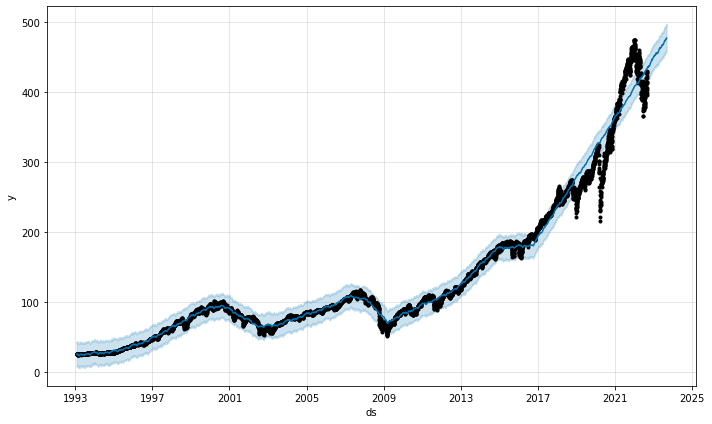

In [12]:
m.plot(forecast);

## Make it a Function

In [13]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-01,231.245407,408.040549,424.083025,231.245407,231.245407,184.847565,184.847565,184.847565,184.847565,184.847565,184.847565,0.0,0.0,0.0,416.092972
1,2022-06-02,228.408620,406.880839,422.062396,228.408620,228.408620,186.175091,186.175091,186.175091,186.175091,186.175091,186.175091,0.0,0.0,0.0,414.583710
2,2022-06-03,225.571832,403.190651,419.581691,225.571832,225.571832,185.747450,185.747450,185.747450,185.747450,185.747450,185.747450,0.0,0.0,0.0,411.319282
3,2022-06-06,217.061470,393.897471,409.858199,217.061470,217.061470,184.551356,184.551356,184.551356,184.551356,184.551356,184.551356,0.0,0.0,0.0,401.612826
4,2022-06-07,214.224683,390.219307,405.892533,214.224683,214.224683,183.635808,183.635808,183.635808,183.635808,183.635808,183.635808,0.0,0.0,0.0,397.860491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2022-10-26,165.611337,291.936726,410.276934,108.026796,225.507085,184.847565,184.847565,184.847565,184.847565,184.847565,184.847565,0.0,0.0,0.0,350.458902
120,2022-10-27,164.634184,290.984873,413.132957,105.038633,226.637876,186.175091,186.175091,186.175091,186.175091,186.175091,186.175091,0.0,0.0,0.0,350.809275
121,2022-10-28,163.657031,288.120196,413.499278,102.718850,227.733328,185.747450,185.747450,185.747450,185.747450,185.747450,185.747450,0.0,0.0,0.0,349.404480
122,2022-10-29,162.679878,-361.658997,-237.171440,100.486987,227.794362,-462.478764,-462.478764,-462.478764,-462.478764,-462.478764,-462.478764,0.0,0.0,0.0,-299.798886


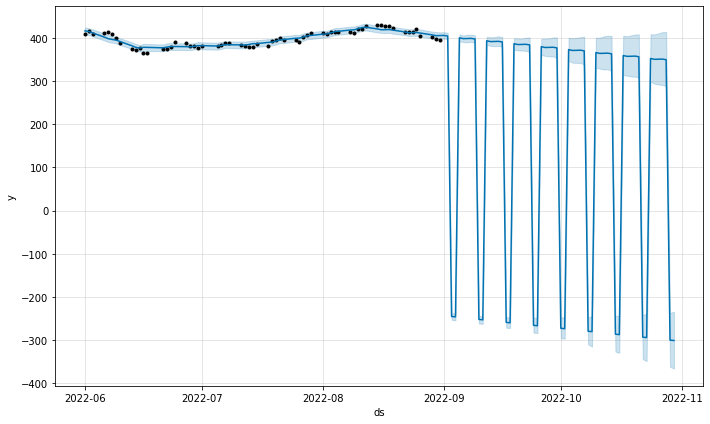

In [20]:
make_forecast('SPY',60,"3mo")

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,13.791188,12.583065,14.361887,13.791188,13.791188,-0.349195,-0.349195,-0.349195,-0.019530,-0.019530,-0.019530,-0.329665,-0.329665,-0.329665,0.0,0.0,0.0,13.441993
1,2017-05-08,13.783188,12.529166,14.347980,13.783188,13.783188,-0.301498,-0.301498,-0.301498,-0.007537,-0.007537,-0.007537,-0.293961,-0.293961,-0.293961,0.0,0.0,0.0,13.481690
2,2017-05-09,13.780521,12.538662,14.453359,13.780521,13.780521,-0.284203,-0.284203,-0.284203,-0.007280,-0.007280,-0.007280,-0.276923,-0.276923,-0.276923,0.0,0.0,0.0,13.496318
3,2017-05-10,13.777854,12.587641,14.475988,13.777854,13.777854,-0.270299,-0.270299,-0.270299,-0.012487,-0.012487,-0.012487,-0.257812,-0.257812,-0.257812,0.0,0.0,0.0,13.507555
4,2017-05-11,13.775187,12.645973,14.440015,13.775187,13.775187,-0.253222,-0.253222,-0.253222,-0.016261,-0.016261,-0.016261,-0.236961,-0.236961,-0.236961,0.0,0.0,0.0,13.521965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2023-02-23,18.473796,17.657090,20.477270,17.426526,19.393728,0.603898,0.603898,0.603898,-0.016261,-0.016261,-0.016261,0.620159,0.620159,0.620159,0.0,0.0,0.0,19.077694
1517,2023-02-24,18.470834,17.689393,20.403167,17.412993,19.403769,0.590786,0.590786,0.590786,-0.019530,-0.019530,-0.019530,0.610315,0.610315,0.610315,0.0,0.0,0.0,19.061620
1518,2023-02-25,18.467873,17.515169,20.389109,17.399459,19.410390,0.624428,0.624428,0.624428,0.031547,0.031547,0.031547,0.592881,0.592881,0.592881,0.0,0.0,0.0,19.092301
1519,2023-02-26,18.464912,17.593596,20.401710,17.385926,19.416242,0.599143,0.599143,0.599143,0.031547,0.031547,0.031547,0.567596,0.567596,0.567596,0.0,0.0,0.0,19.064055


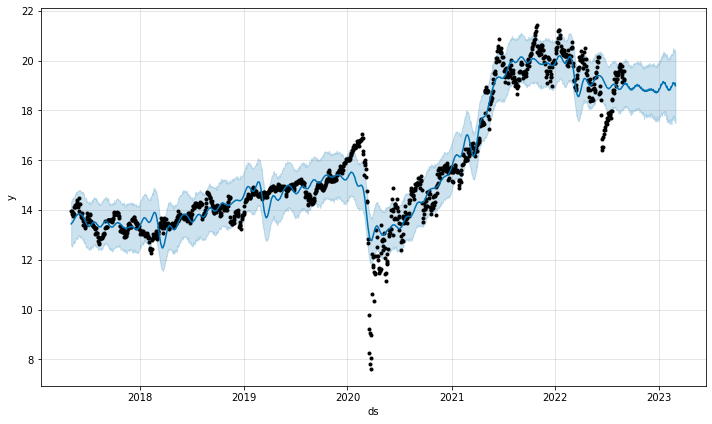

In [14]:
# kkr real estate finance trust
make_forecast('KREF', 180)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2712,2024-08-26,44.035771,-18.315888,99.846659,-19.325735,99.879120,0.939099,0.939099,0.939099,0.881903,0.881903,0.881903,0.057196,0.057196,0.057196,0.0,0.0,0.0,44.974870
2713,2024-08-27,44.042359,-20.328936,103.895875,-19.387467,99.963492,1.021108,1.021108,1.021108,0.958696,0.958696,0.958696,0.062412,0.062412,0.062412,0.0,0.0,0.0,45.063467
2714,2024-08-28,44.048947,-17.637278,103.135194,-19.548705,100.178431,0.994048,0.994048,0.994048,0.938445,0.938445,0.938445,0.055603,0.055603,0.055603,0.0,0.0,0.0,45.042995
2715,2024-08-29,44.055535,-19.624296,101.636440,-19.709942,100.393370,1.048298,1.048298,1.048298,1.010701,1.010701,1.010701,0.037598,0.037598,0.037598,0.0,0.0,0.0,45.103833
2716,2024-08-30,44.062123,-18.570143,103.137626,-19.871180,100.608309,1.018460,1.018460,1.018460,1.008918,1.008918,1.008918,0.009541,0.009541,0.009541,0.0,0.0,0.0,45.080583


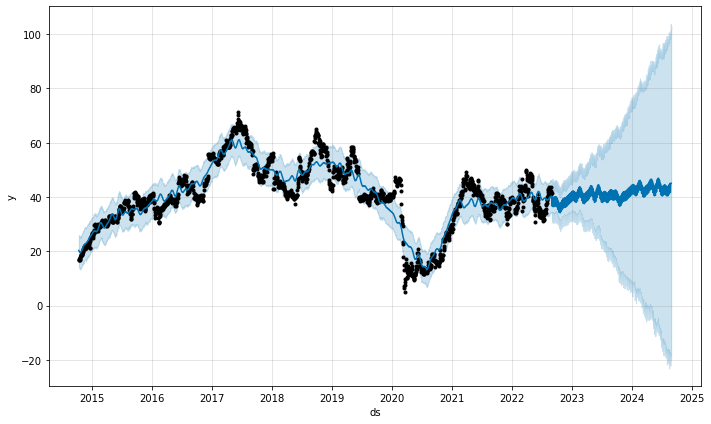

In [15]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

,ds,yhat,yhat_lower,yhat_upper
1386,2022-09-01,6.501201,1.575875,11.429911
1387,2022-09-02,6.490167,1.692847,11.251582
1388,2022-09-03,7.153951,2.326326,11.859345
1389,2022-09-04,7.010995,1.970559,11.709876
1390,2022-09-05,5.954300,1.359518,10.924243
...,...,...,...,...
1746,2023-08-27,-52.945351,-70.207425,-35.848162
1747,2023-08-28,-54.057904,-72.197544,-35.919949
1748,2023-08-29,-54.264193,-72.795959,-37.064014
1749,2023-08-30,-54.443795,-72.606884,-36.369220


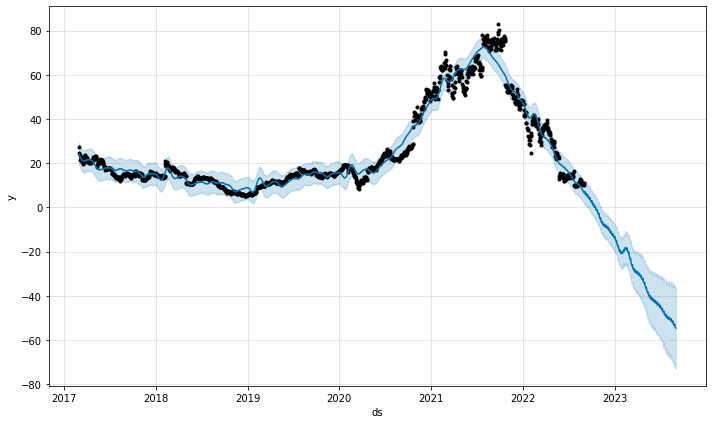

In [16]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast